# Calculating CpG ratio for the *Porites astreoides* transcriptome

This workflow calculates CpG ratio, or CpG O/E, for contigs in the *Porites astreoides* [transcriptome](https://dl.dropboxusercontent.com/u/37523721/pastreoides_transcriptome_july2014.zip). CpG ratio is an estimate of germline DNA methylation.

This workflow is an extension of another IPython notebook workflow, `Past_blast_anno.ipynb`, that generates an annotation of the same transcriptome. This workflow assumes that you have created the directories and files specified in the annotation workflow.

In [2]:
cd .data/Past

/Users/jd/Documents/Projects/Coral-CpG-ratio-MS/data/Past


In [3]:
#fasta file
!head -2 Past.fasta
!echo 
!echo number of seqs =
!fgrep -c ">" Past.fasta

>GCKDGN101CF7JK gene=GCKDGN101CF7JK
GCAGTTCACATGACCCGAGGCTAGGAGATCCCATGAGATAGCACAGTGCAAGCGTGACTCATTGCACATGTGCTTGCAACGCGACTGGCGTCTTCTCGACGAGCTCCTGAGTATTTTCACAAGATTGGCCCCTATTTCTCAATGCCGTTGGGAAAATTATTGGGCCGTAGAAAACAGAATATCACACTAATGTAGTTGGTAGGTTAGCAAAACCAGTACCAGC

number of seqs =
30740


In [4]:
#Just printing first line w/out comments and looking at contig names
!awk '{print $1}' Past.fasta > Past2.fasta
!head -10 Past2.fasta
!tail -10 Past2.fasta

>GCKDGN101CF7JK
GCAGTTCACATGACCCGAGGCTAGGAGATCCCATGAGATAGCACAGTGCAAGCGTGACTCATTGCACATGTGCTTGCAACGCGACTGGCGTCTTCTCGACGAGCTCCTGAGTATTTTCACAAGATTGGCCCCTATTTCTCAATGCCGTTGGGAAAATTATTGGGCCGTAGAAAACAGAATATCACACTAATGTAGTTGGTAGGTTAGCAAAACCAGTACCAGC
>GCKDGN101CAZ1A
GCAGTTGACTGTCATTTCCCAGGGGACGATACAGTGCCACCACAATGACGTACTTACCGCTGGGGCTTGGCGCTGCCCCCATGCCTAGCTGATTGGTGTCTCTCCATATCATCTGTGTGAAGTGCTTTACTTTGTCATTGAGAACTGGATAGGAGAAGCTGTACGCTTTCTTCTCGCCGTACCATATAGTCGTGGCCTTGAGAGGTGCTCTCTGCAGATCGTGCCATATCTGTGCAATGTTTTCACCCGCTGGCTCGCCTTGGAAAGTGGACGGGTCACTGGCTACAGACTCTGCTATATTCTGCGCTTGTTCTGCTAGAGTGGCATTCCATTGTAAAGGGNGGACGTGATGAAGTGATCTGA
>GCKDGN101ANI4S
TGTCCTGTCTTTCTTCGTTGTTCTTCTTGACCTGCTATACACATTAAACCACTCTGGGTGATGATCCATCTTCTCCGACATGAGAGCCACGCGGCTCATGAAACCAAATGCCTGGTTGAAATTCTTGAACTTAAACTCTTTGTAAATGGCATCACGGCCTTCGACATCAGTCCACCCTGAGGACTTCAGAGGCTGAACCTCTGTTTCCCTTTCC
>GCKDGN101BV6U3
GCAGTATAGTCGTAGTTGATAGCGCATGGGTAGCATGTCTGGTGCGCAGGGCGCCAGTGCATATCCCACATAAACTTATTTGGCGATGTGTCAATGTATGACGTAAATTCGTCAAACGTTGGCCCAGAACACT

In [5]:
#Converting FASTA to tabular format and placing output file in analyses directory
!perl -e '$count=0; $len=0; while(<>) {s/\r?\n//; s/\t/ /g; if (s/^>//) { if ($. != 1) {print "\n"} s/ |$/\t/; $count++; $_ .= "\t";} else {s/ //g; $len += length($_)} print $_;} print "\n"; warn "\nConverted $count FASTA records in $. lines to tabular format\nTotal sequence length: $len\n\n";' \
Past2.fasta > ../../analyses/Past/fasta2tab


Converted 30740 FASTA records in 61480 lines to tabular format
Total sequence length: 16907062



In [1]:
cd ../../analyses/Past

/Users/jd/Documents/Projects/Coral-CpG-ratio-MS/analyses/Past


In [7]:
#Checking header on new tabular format file
!head -2 fasta2tab

GCKDGN101CF7JK		GCAGTTCACATGACCCGAGGCTAGGAGATCCCATGAGATAGCACAGTGCAAGCGTGACTCATTGCACATGTGCTTGCAACGCGACTGGCGTCTTCTCGACGAGCTCCTGAGTATTTTCACAAGATTGGCCCCTATTTCTCAATGCCGTTGGGAAAATTATTGGGCCGTAGAAAACAGAATATCACACTAATGTAGTTGGTAGGTTAGCAAAACCAGTACCAGC
GCKDGN101CAZ1A		GCAGTTGACTGTCATTTCCCAGGGGACGATACAGTGCCACCACAATGACGTACTTACCGCTGGGGCTTGGCGCTGCCCCCATGCCTAGCTGATTGGTGTCTCTCCATATCATCTGTGTGAAGTGCTTTACTTTGTCATTGAGAACTGGATAGGAGAAGCTGTACGCTTTCTTCTCGCCGTACCATATAGTCGTGGCCTTGAGAGGTGCTCTCTGCAGATCGTGCCATATCTGTGCAATGTTTTCACCCGCTGGCTCGCCTTGGAAAGTGGACGGGTCACTGGCTACAGACTCTGCTATATTCTGCGCTTGTTCTGCTAGAGTGGCATTCCATTGTAAAGGGNGGACGTGATGAAGTGATCTGA


In [8]:
#Add column with length of sequence
!perl -e '$col = 2;' -e 'while (<>) { s/\r?\n//; @F = split /\t/, $_; $len = length($F[$col]); print "$_\t$len\n" } warn "\nAdded column with length of column $col for $. lines.\n\n";' \
fasta2tab > tab_1


Added column with length of column 2 for 30740 lines.



In [9]:
!wc tab_1

   30740   92220 17482850 tab_1


In [10]:
#The file used to count Cs and Gs will only include the sequence
!awk '{print $2}' tab_1 > tab_2

In [11]:
#This counts CGs - both cases
!echo "CG" | awk -F\[Cc][Gg] '{print NF-1}' tab_2 > CG 

In [12]:
#Counts Cs
!echo "C" | awk -F\[Cc] '{print NF-1}' tab_2 > C 

In [13]:
#Counts Gs
!echo "G" | awk -F\[Gg] '{print NF-1}' tab_2 > G 

In [14]:
#Combining counts
!paste tab_1 \
CG \
C \
G \
> comb
!head -1 comb

GCKDGN101CF7JK		GCAGTTCACATGACCCGAGGCTAGGAGATCCCATGAGATAGCACAGTGCAAGCGTGACTCATTGCACATGTGCTTGCAACGCGACTGGCGTCTTCTCGACGAGCTCCTGAGTATTTTCACAAGATTGGCCCCTATTTCTCAATGCCGTTGGGAAAATTATTGGGCCGTAGAAAACAGAATATCACACTAATGTAGTTGGTAGGTTAGCAAAACCAGTACCAGC	223	9	53	54


# Calculating CpGo/e based on [Gavery and Roberts (2010)](http://www.biomedcentral.com/1471-2164/11/483)

<img src="http://eagle.fish.washington.edu/cnidarian/skitch/BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png" alt="BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png"/>

In [15]:
!awk '{print $1, "\t", (($4)/($5*$6))*(($3^2)/($3-1))}' comb > ID_CpG #use ^ instead of ** for exponent


In [16]:
!head ID_CpG
!wc ID_CpG

GCKDGN101CF7JK 	 0.704417
GCKDGN101CAZ1A 	 0.590914
GCKDGN101ANI4S 	 0.542256
GCKDGN101BV6U3 	 1.15835
GCKDGN101BQG8Q 	 0.926274
GCKDGN101CG9W2 	 0.802327
GCKDGN101A7H4U 	 1.20891
GCKDGN101ATRIP 	 0.256737
GCKDGN101CINM3 	 0.342108
GCKDGN101BOM13 	 0.69067
   30740   61480  716743 ID_CpG


# Now joining CpG to annotation, but first must sort files.

In [3]:
#Sorting Past Uniprot/Swissprot annotation file. This file was the result of work done in another notebook: 
#Past_blast_anno.ipynb
!sort Past_blastx_uniprot.sql.tab | tail -n +2 > Past_blastx_uniprot.sql.tab.sorted
!head Past_blastx_uniprot.sql.tab.sorted

GCKDGN101A00ZL	sp	Q23979	MY61F_DROME	70.97	124	35	1	371	3	322	445	3e-54	  187
GCKDGN101A02W5	sp	Q9PT84	KCNH2_CHICK	42.35	85	43	2	238	2	75	159	2e-09	57.0
GCKDGN101A03XE	sp	Q5RA96	GUAA_PONAB	76.15	109	26	0	338	12	28	136	1e-51	  179
GCKDGN101A06FB	sp	Q5PQ63	IMP2L_XENLA	65.45	55	19	0	7	171	105	159	2e-12	63.9
GCKDGN101A08CL	sp	Q09328	MGT5A_HUMAN	57.89	57	24	0	87	257	141	197	2e-16	79.0
GCKDGN101A097A	sp	Q3MHG6	GTPBA_BOVIN	43.42	76	42	1	17	244	81	155	6e-13	66.6
GCKDGN101A0KSC	sp	Q6P2K6	P4R3A_MOUSE	60.00	90	33	1	273	4	96	182	2e-25	  105
GCKDGN101A0M8H	sp	A2RUR9	C144A_HUMAN	29.31	116	75	2	386	42	1232	1341	3e-09	58.5
GCKDGN101A0NCL	sp	Q08AV6	TBCC1_XENLA	40.78	103	59	2	8	310	178	280	2e-17	81.3
GCKDGN101A0S0M	sp	O00763	ACACB_HUMAN	67.20	125	41	0	381	7	326	450	8e-55	  191


In [18]:
#Sorting GOSlim annotation file. This file was the result of work done in another notebook: Past_blast_anno.ipynb
!sort Past_GOSlim.tab | tail -n +2 > Past_GOSlim.sorted
!head Past_GOSlim.sorted

In [6]:
#Sorting CpG file
!sort ID_CpG > ID_CpG.sorted
!head ID_CpG.sorted

GCKDGN101A00AO 	 0.383276
GCKDGN101A00ZL 	 0.335379
GCKDGN101A028J 	 0.524246
GCKDGN101A02W5 	 0.559472
GCKDGN101A03QE 	 0.177286
GCKDGN101A03XE 	 0.618671
GCKDGN101A0607 	 1.03824
GCKDGN101A06FB 	 0.207357
GCKDGN101A0884 	 0.876202
GCKDGN101A08CL 	 0.342674


In [7]:
!join ID_CpG.sorted Past_blastx_uniprot.sql.tab.sorted | awk '{print $1, "\t", $2}' > Past_cpg_anno

In [8]:
!head Past_cpg_anno

GCKDGN101A00ZL 	 0.335379
GCKDGN101A02W5 	 0.559472
GCKDGN101A03XE 	 0.618671
GCKDGN101A06FB 	 0.207357
GCKDGN101A08CL 	 0.342674
GCKDGN101A097A 	 0.679228
GCKDGN101A0KSC 	 1.03959
GCKDGN101A0M8H 	 0.78113
GCKDGN101A0NCL 	 0.404416
GCKDGN101A0S0M 	 0.254499


In [20]:
!join ID_CpG.sorted Past_GOSlim.sorted > Past_cpg_GOslim

In [21]:
!head Past_cpg_GOslim

In [22]:
#Putting tabs in between columns
!awk '{print $1, "\t", $2, "\t", $3, $4, $5, $6}' Past_cpg_GOslim > Past_cpg_GOslim.tab
!head Past_cpg_GOslim.tab

# Now time to plot data using pandas and matplot

In [9]:
import pandas as pd

In [10]:
jData = pd.read_table('Past_cpg_GOslim.tab', header=None)
jData

,0,1,2
0,GCKDGN101A00AO,0.383276,other biological processes
1,,NaN,NaN
2,GCKDGN101A00ZL,0.335379,cell organization and biogenesis
3,GCKDGN101A00ZL,0.335379,developmental processes
4,,NaN,NaN
5,GCKDGN101A00ZL,0.335379,stress response
6,,NaN,NaN
7,GCKDGN101A028J,0.524246,RNA metabolism
8,,NaN,NaN
9,GCKDGN101A028J,0.524246,other biological processes


In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt 

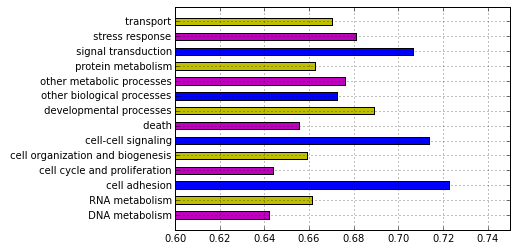

In [13]:
jData.groupby(2)[1].mean().plot(kind='barh', color=list('myb'))
plt.axis([0.6, 0.75, -1, 14])
plt.xlabel('')
plt.ylabel('')
plt.show()

In [15]:
#To plot density curve, must use CpG data with original annotation
CpG = pd.read_table('Past_cpg_anno', header=None, )
CpG

,0,1
0,GCKDGN101A00ZL,0.335379
1,GCKDGN101A02W5,0.559472
2,GCKDGN101A03XE,0.618671
3,GCKDGN101A06FB,0.207357
4,GCKDGN101A08CL,0.342674
5,GCKDGN101A097A,0.679228
6,GCKDGN101A0KSC,1.039590
7,GCKDGN101A0M8H,0.781130
8,GCKDGN101A0NCL,0.404416
9,GCKDGN101A0S0M,0.254499


In [16]:
# pandas density plot
CpG[0].plot(kind='kde', linewidth=3);
plt.axis([-0.3, 1.7, 0, 1.7])

TypeError: Empty 'Series': no numeric data to plot